In [1]:
%matplotlib inline

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("ggplot")

# Load and parse Iris data set from URL

In [2]:
iris = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
data = pd.read_csv(iris, header=None, encoding="utf-8")

# Process and clean the data

In [3]:
proc = preprocessing.LabelEncoder()
sepal_length = proc.fit_transform(list(data[0]))
sepal_width = proc.fit_transform(list(data[1]))
petal_length = proc.fit_transform(list(data[2]))
petal_width = proc.fit_transform(list(data[3]))
species = proc.fit_transform(list(data[4]))

predict = 4 # Species 

x = list(zip(sepal_length, sepal_width, petal_length, petal_width))
y = list(species)

# Train and predict species

In [4]:
variations = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
best = 0
worst = 100
results = []

for i in range(105):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.7)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    if accuracy > best:
        best = accuracy
    elif accuracy < worst:
        worst = accuracy
    
    prediction = model.predict(x_test)
    results.append(f"Prediction:\t{variations[prediction[i]].ljust(10)}\t\tActual: {variations[y_test[i]].ljust(10)}\t\tAccuracy: {str(round(accuracy * 100, 2)).ljust(5)}%\tData: {x_test[i]}")

In [5]:
for result in results:
    print(result)
    
print(f"\nHighest Accuracy: {round((best * 100), 2)}%")
print(f"Worst Accuracy: {round((worst * 100), 2)}%")

Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 97.14%	Data: (15, 19, 2, 1)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 97.14%	Data: (17, 9, 24, 14)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 95.24%	Data: (12, 3, 14, 7)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 97.14%	Data: (16, 11, 24, 14)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 95.24%	Data: (20, 2, 20, 9)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 93.33%	Data: (9, 14, 5, 1)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 93.33%	Data: (33, 9, 37, 19)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (6, 10, 5, 0)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 85.71%	Data: (2, 2, 3, 2)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 86.67%	Data: (8, 4, 9, 7)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 96.19%	Data: (18, 7, 16, 9)
Prediction:	Iris-setosa		A

# Graphical illustration

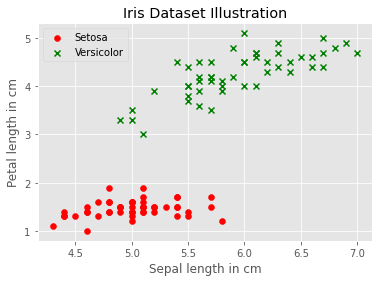

In [6]:
y = data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

X = data.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")

plt.title("Iris Dataset Illustration")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.grid(True)
plt.legend()


# 3D Modeling (Not Iris related yet)

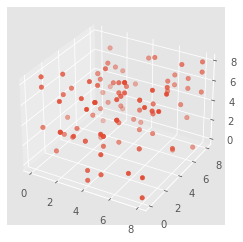

In [19]:
import random
from mpl_toolkits import mplot3d


x = [random.randrange(0, 9) for _ in range(100)]
y = [random.randrange(0, 9) for _ in range(100)]
z = [random.randrange(0, 9) for _ in range(100)]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z)



# Perceptron method

In [7]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Convergion example; When a neural network reaches the peak of preciseness

Text(0, 0.5, 'Amount of updates')

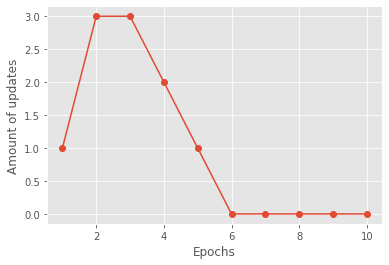

In [8]:
ppn = Perceptron(eta=0.7, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Amount of updates")